In [1]:
import numpy as np
import matplotlib as plt
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# See 'Read Me' github file for data details

# 2004-2024 Yahoo Finance Data (cleaned in sql)
vv = pd.read_csv("vv_clean.csv")
rsp = pd.read_csv("rsp_clean.csv")
spx = pd.read_csv("spx_clean.csv")
tlt = pd.read_csv("tlt_clean.csv")
vb = pd.read_csv("vb_clean.csv")

# 2008-2019 Yahoo Finance Data (cleaned in sql)
vv_08_19 = pd.read_csv("vv_clean_MAR08_DEC19.csv")
vb_08_19 = pd.read_csv("vb_clean_MAR08_DEC19.csv")
rsp_08_19 = pd.read_csv("rsp_clean_MAR08_DEC19.csv")
spx_08_19 = pd.read_csv("spx_clean_MAR08_DEC19.csv")

In [3]:
# Cell function: calculate yearly returns from 2004 - 2024

def calculate_yearly_return(filename):
    # Load data for yearly return calculation and format data
    df = pd.read_csv(filename)
    df['Date'] = pd.to_datetime(df['Date'])
    df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
    
    # Filter date and sort by date
    df = df[(df['Date'].dt.month == 3) & (df['Date'].dt.day == 1)]
    df = df.sort_values(by='Date')
    
    # Calculate yearly return using pct_change function
    # format into pct, handle empty vals, return
    df['Yearly Returns'] = df['Close'].pct_change() * 100
    df['Yearly Returns'] = df['Yearly Returns'].fillna(0)
    return df[['Date', 'Close', 'Yearly Returns']]

# Calculate returns
vv_returns = calculate_yearly_return("vv_clean.csv")
vb_returns = calculate_yearly_return("vb_clean.csv")
rsp_returns = calculate_yearly_return("rsp_clean.csv")
spx_returns = calculate_yearly_return("spx_clean.csv")
tlt_returns = calculate_yearly_return("tlt_clean.csv")

# Format & Print
print("VV Index Fund Returns:")
print(vv_returns)
print("\nVB Index Fund Returns:")
print(rsp_returns)
print("\nRSP Index Fund Returns:")
print(rsp_returns)
print("\nSPX Index Fund Returns:")
print(spx_returns)
print("\nTLT Index Fund Returns:")
print(tlt_returns)


VV Index Fund Returns:
          Date   Close  Yearly Returns
1   2004-03-01   49.20        0.000000
13  2005-03-01   51.80        5.284553
25  2006-03-01   57.75       11.486486
37  2007-03-01   63.33        9.662338
49  2008-03-01   59.49       -6.063477
61  2009-03-01   36.02      -39.452009
73  2010-03-01   53.30       47.973348
85  2011-03-01   60.77       14.015009
97  2012-03-01   64.43        6.022709
109 2013-03-01   71.74       11.345646
121 2014-03-01   86.02       19.905213
133 2015-03-01   95.20       10.671937
145 2016-03-01   94.01       -1.250000
157 2017-03-01  108.09       14.977130
169 2018-03-01  121.21       12.138033
181 2019-03-01  129.80        7.086874
193 2020-03-01  118.43       -8.759630
205 2021-03-01  185.30       56.463734
217 2022-03-01  208.49       12.514841
229 2023-03-01  186.81      -10.398580
241 2024-03-01  239.76       28.344307

VB Index Fund Returns:
          Date   Close  Yearly Returns
2   2004-03-01   35.00        0.000000
14  2005-03-01   

In [4]:
import pandas as pd

def calculate_total_return(df, start_date, end_date):
    #format data
    df['Date'] = pd.to_datetime(df['Date'])
    df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
    df = df.sort_values(by='Date')
    
    # define initial and final values
    # isolate years
    initial_value = df.iloc[0]['Close']
    final_value = df.iloc[-1]['Close']
    total_years = (df['Date'].iloc[-1] - df['Date'].iloc[0]).days / 365.25
    
    # Calculate total return and anualized (w/ cagr formula)
    total_return = (final_value / initial_value - 1) * 100  
    cagr = ((final_value / initial_value) ** (1 / total_years) - 1) * 100  
    
    return total_return, cagr

# define dates (mar2004 - mar2024)
start_date = '2004-03-01'
end_date = '2024-03-01'

# calculate individual fund returns and print
total_return_vv, cagr_vv = calculate_total_return(vv, start_date, end_date)
print(f"Total 20-year return for VV: {total_return_vv:.2f}%")
print(f"Annualized (CAGR) return for VV: {cagr_vv:.2f}%")

total_return_vb, cagr_vb = calculate_total_return(vb, start_date, end_date)
print(f"Total 20-year return for VB: {total_return_vb:.2f}%")
print(f"Annualized (CAGR) return for VB: {cagr_vb:.2f}%")

total_return_rsp, cagr_rsp = calculate_total_return(rsp, start_date, end_date)
print(f"Total 20-year return for RSP: {total_return_rsp:.2f}%")
print(f"Annualized (CAGR) return for RSP: {cagr_rsp:.2f}%")

total_return_spx, cagr_spx = calculate_total_return(spx, start_date, end_date)
print(f"Total 20-year return for SPX: {total_return_spx:.2f}%")
print(f"Annualized (CAGR) return for SPX: {cagr_spx:.2f}%")

total_return_tlt, cagr_tlt = calculate_total_return(tlt, start_date, end_date)
print(f"Total 20-year return for TLT: {total_return_tlt:.2f}%")
print(f"Annualized (CAGR) return for TLT: {cagr_tlt:.2f}%")


Total 20-year return for VV: 387.32%
Annualized (CAGR) return for VV: 8.24%
Total 20-year return for VB: 353.55%
Annualized (CAGR) return for VB: 7.85%
Total 20-year return for RSP: 383.91%
Annualized (CAGR) return for RSP: 8.20%
Total 20-year return for SPX: 366.55%
Annualized (CAGR) return for SPX: 8.01%
Total 20-year return for TLT: 5.66%
Annualized (CAGR) return for TLT: 0.28%


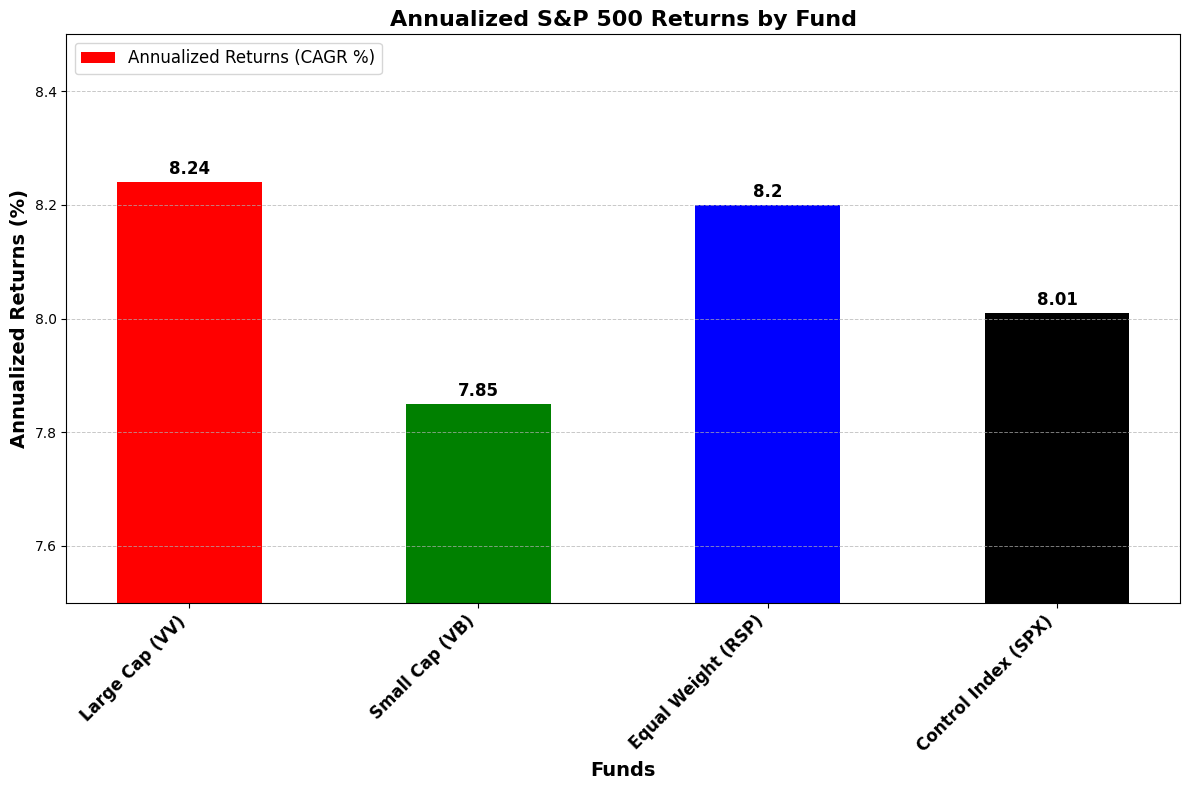

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Data
labels = ['Large Cap (VV)', 'Small Cap (VB)', 'Equal Weight (RSP)', 'Control Index (SPX)']
annualized_returns = [8.24, 7.85, 8.20, 8.01]  
colors = ['red', 'green', 'blue', 'black']

# Positions
x = np.arange(len(labels))  

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
rects = ax.bar(x, annualized_returns, width=0.5, color=colors)

# Labels and Title
ax.set_xlabel('Funds', fontsize=14, fontweight='bold')
ax.set_ylabel('Annualized Returns (%)', fontsize=14, fontweight='bold')
ax.set_title('Annualized S&P 500 Returns by Fund', fontsize=16, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12, fontweight='bold', rotation=45, ha='right')

# Add horizontal gridlines
ax.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Add data labels
ax.bar_label(rects, padding=3, fontsize=12, fontweight='bold')

# Set y-axis limit
ax.set_ylim(7.5, 8.5)

# Add a legend
ax.legend(['Annualized Returns (CAGR %)'], loc='upper left', fontsize=12)

# Tight layout for better spacing
fig.tight_layout()

# Show plot
plt.show()


In [6]:

# format date
vv['Date'] = pd.to_datetime(vv['Date'])
vb['Date'] = pd.to_datetime(vb['Date'])
rsp['Date'] = pd.to_datetime(rsp['Date'])
spx['Date'] = pd.to_datetime(spx['Date'])

# set to close date price for each fund
vv['Close'] = pd.to_numeric(vv['Close'], errors='coerce')
vb['Close'] = pd.to_numeric(vb['Close'], errors='coerce')
rsp['Close'] = pd.to_numeric(rsp['Close'], errors='coerce')
spx['Close'] = pd.to_numeric(spx['Close'], errors='coerce')

# calculate quarterly returns
def quarterly_returns(df):
    df.set_index('Date', inplace=True)
    quarterly = df.resample('Q').last()  # Resample to get data at the end of each quarter
    quarterly['Quarterly Returns'] = quarterly['Close'].pct_change()
    return quarterly.dropna()  # Removing the first entry which will be NaN

vv_quarterly = quarterly_returns(vv)
vb_quarterly = quarterly_returns(vb)
rsp_quarterly = quarterly_returns(rsp)
spx_quarterly = quarterly_returns(spx)

# create volatility index
# takes the standard deviation in difference in stock price from quarter to quarter
# Higher differences in quarter to quarter prices = higher volatility 
def calculate_volatility(df):
    volatility = df['Quarterly Returns'].std() * 100  # Convert decimal to percentage
    return f"{volatility:.2f}%" 

# calculate volatility for each fund
vv_volatility = calculate_volatility(vv_quarterly)
vb_volatility = calculate_volatility(vb_quarterly)
rsp_volatility = calculate_volatility(rsp_quarterly)
spx_volatility = calculate_volatility(spx_quarterly)

print(f"Volatility of VV: {vv_volatility}")
print(f"Volatility of VB: {vb_volatility}")
print(f"Volatility of RSP: {rsp_volatility}")
print(f"Volatility of SPX: {spx_volatility}")



Volatility of VV: 8.03%
Volatility of VB: 10.25%
Volatility of RSP: 9.11%
Volatility of SPX: 7.93%


C:\Users\ziegl\AppData\Local\Temp\ipykernel_7360\2153221291.py:16: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly = df.resample('Q').last()  # Resample to get data at the end of each quarter
C:\Users\ziegl\AppData\Local\Temp\ipykernel_7360\2153221291.py:16: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly = df.resample('Q').last()  # Resample to get data at the end of each quarter
C:\Users\ziegl\AppData\Local\Temp\ipykernel_7360\2153221291.py:16: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly = df.resample('Q').last()  # Resample to get data at the end of each quarter
C:\Users\ziegl\AppData\Local\Temp\ipykernel_7360\2153221291.py:16: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly = df.resample('Q').last()  # Resample to get data at the 

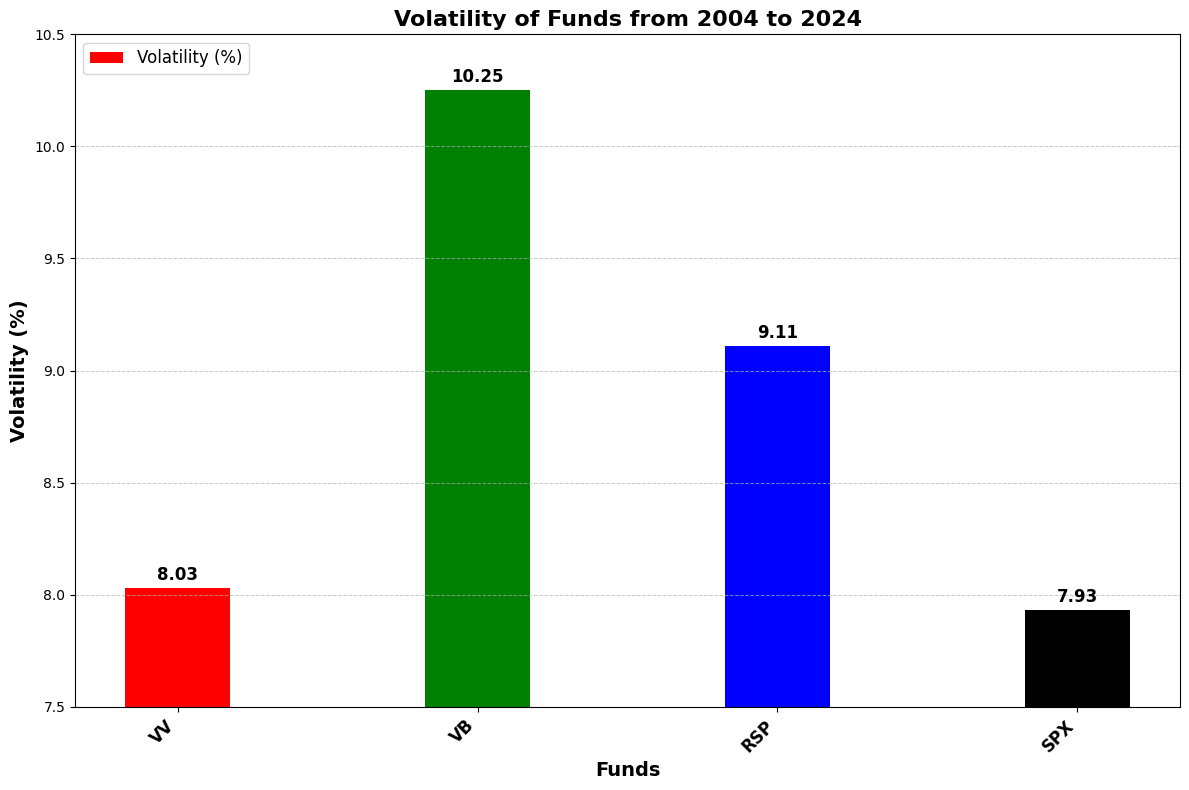

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Data
volatility_data = {
    'VV': 8.03,
    'VB': 10.25,
    'RSP': 9.11,
    'SPX': 7.93
}

labels = list(volatility_data.keys())
volatilities = list(volatility_data.values())

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
rects = ax.bar(x, volatilities, width, color=['red', 'green', 'blue', 'black'])

# Labels and Title
ax.set_xlabel('Funds', fontsize=14, fontweight='bold')
ax.set_ylabel('Volatility (%)', fontsize=14, fontweight='bold')
ax.set_title('Volatility of Funds from 2004 to 2024', fontsize=16, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12, fontweight='bold', rotation=45, ha='right')

# Add horizontal gridlines
ax.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Add data labels
ax.bar_label(rects, padding=3, fontsize=12, fontweight='bold')

# Set y-axis limit
ax.set_ylim(7.5, 10.5)

# Add a legend
ax.legend(['Volatility (%)'], loc='upper left', fontsize=12)

# Tight layout for better spacing
fig.tight_layout()

# Show plot
plt.show()


C:\Users\ziegl\AppData\Local\Temp\ipykernel_7360\611284449.py:7: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly = df.resample('Y').last()
C:\Users\ziegl\AppData\Local\Temp\ipykernel_7360\611284449.py:7: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly = df.resample('Y').last()
C:\Users\ziegl\AppData\Local\Temp\ipykernel_7360\611284449.py:7: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly = df.resample('Y').last()
C:\Users\ziegl\AppData\Local\Temp\ipykernel_7360\611284449.py:7: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly = df.resample('Y').last()


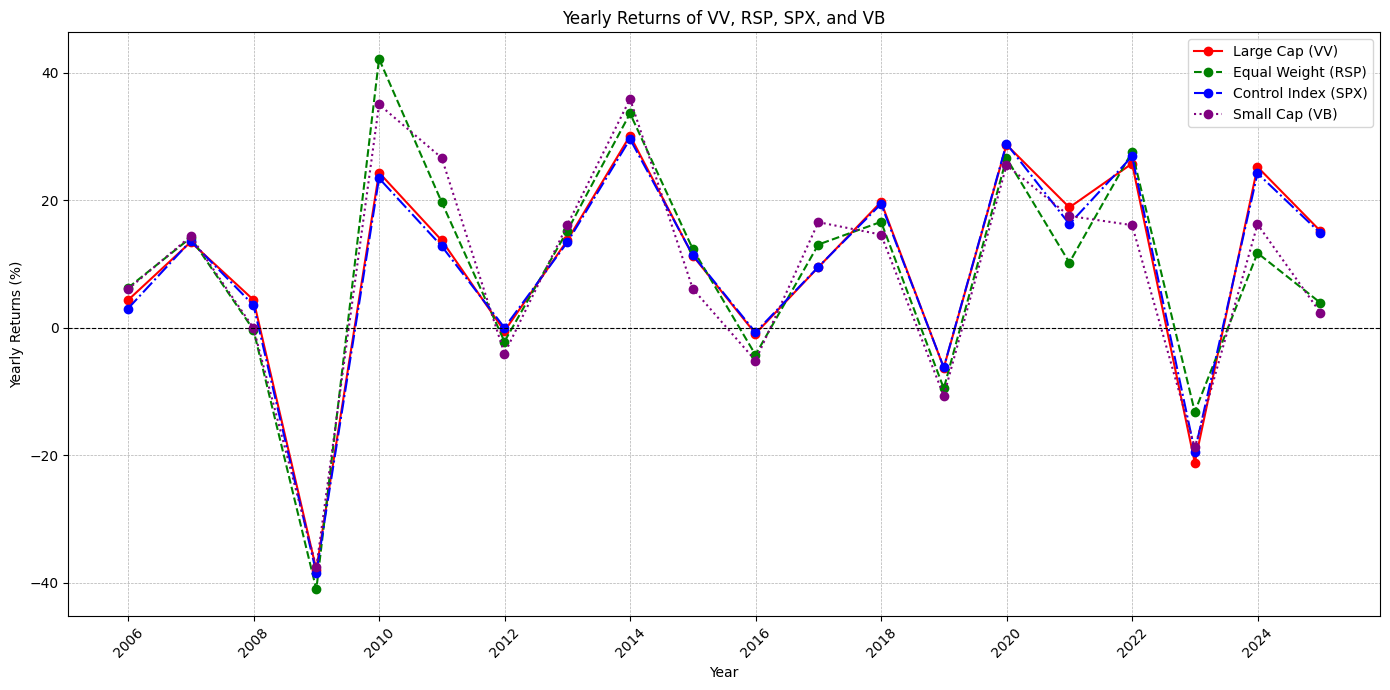

In [8]:

# Function to load data and calculate yearly returns
def load_and_calculate_returns(filename):
    df = pd.read_csv(filename)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    # Resample to annual data and take the last observation
    yearly = df.resample('Y').last()
    # Calculate yearly returns
    returns = yearly['Close'].pct_change() * 100
    return returns.dropna()

# Load and calculate returns for each fund
vv_return= load_and_calculate_returns("vv_clean.csv")
rsp_return = load_and_calculate_returns("rsp_clean.csv")
spx_return = load_and_calculate_returns("spx_clean.csv")
vb_return = load_and_calculate_returns("vb_clean.csv")

# Create the plot
# Assuming yearly returns are already calculated and stored in dataframes
# (vv_returns, rsp_returns, spx_returns, vb_returns)

plt.figure(figsize=(14, 7))

# Plot each fund with a different style
plt.plot(vv_return.index, vv_return.values, label='Large Cap (VV)', color='red', marker='o')
plt.plot(rsp_return.index, rsp_return.values, label='Equal Weight (RSP)', color='green', marker='o', linestyle='--')
plt.plot(spx_return.index, spx_return.values, label='Control Index (SPX)', color='blue', marker='o', linestyle='-.')
plt.plot(vb_return.index, vb_return.values, label='Small Cap (VB)', color='purple', marker='o', linestyle=':')

# Add a zero line for reference
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')

# Enhance readability
plt.title('Yearly Returns of VV, RSP, SPX, and VB')
plt.xlabel('Year')
plt.ylabel('Yearly Returns (%)')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

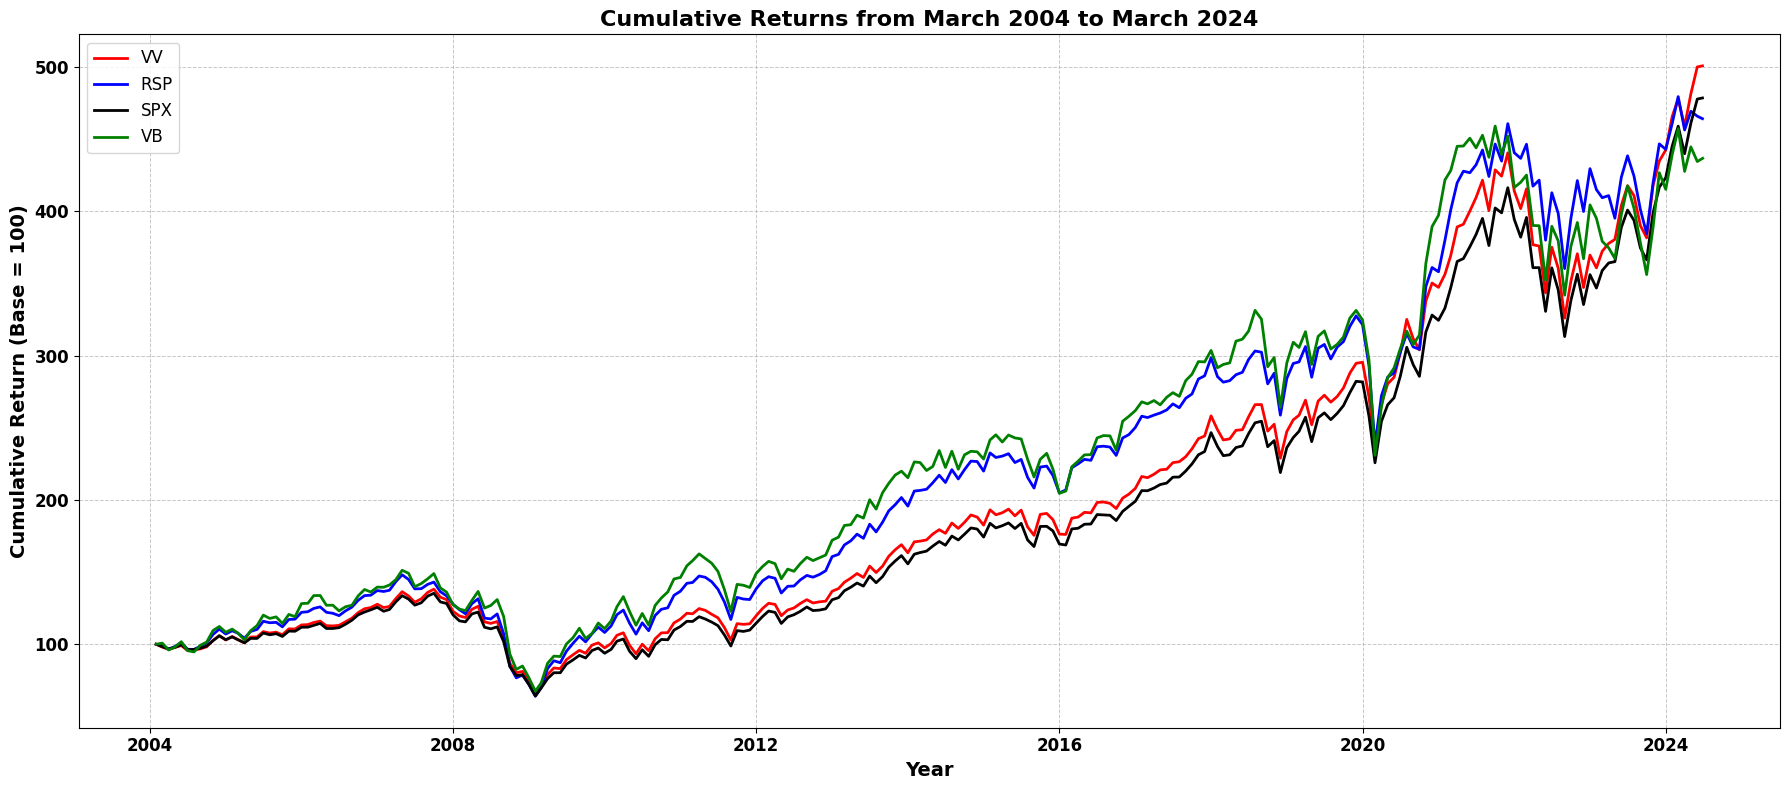

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

def load_data(filename):
    df = pd.read_csv(filename)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    return df['Close']

# Load data
indices = {
    'VV': load_data('vv_clean.csv'),
    'RSP': load_data('rsp_clean.csv'),
    'SPX': load_data('spx_clean.csv'),
    'VB': load_data('vb_clean.csv')
}

# Find the latest starting date among all indices
start_date = max(df.index.min() for df in indices.values())

# Calculate cumulative returns from the same start date
cumulative_returns = {}
for key, data in indices.items():
    # Normalize only the data starting from the found start_date
    valid_data = data[data.index >= start_date]
    cumulative_returns[key] = (valid_data / valid_data.iloc[0] * 100)

# Plotting the cumulative returns
plt.figure(figsize=(18, 8))

# Define colors to match bar graphs
colors = {'VV': 'red', 'RSP': 'blue', 'SPX': 'black', 'VB': 'green'}

for key, data in cumulative_returns.items():
    plt.plot(data.index, data, label=key, linewidth=2, color=colors[key])

# Enhance the plot with better formatting
plt.title('Cumulative Returns from March 2004 to March 2024', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Cumulative Return (Base = 100)', fontsize=14, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

# Tight layout for better spacing
plt.tight_layout()

# Show plot
plt.show()


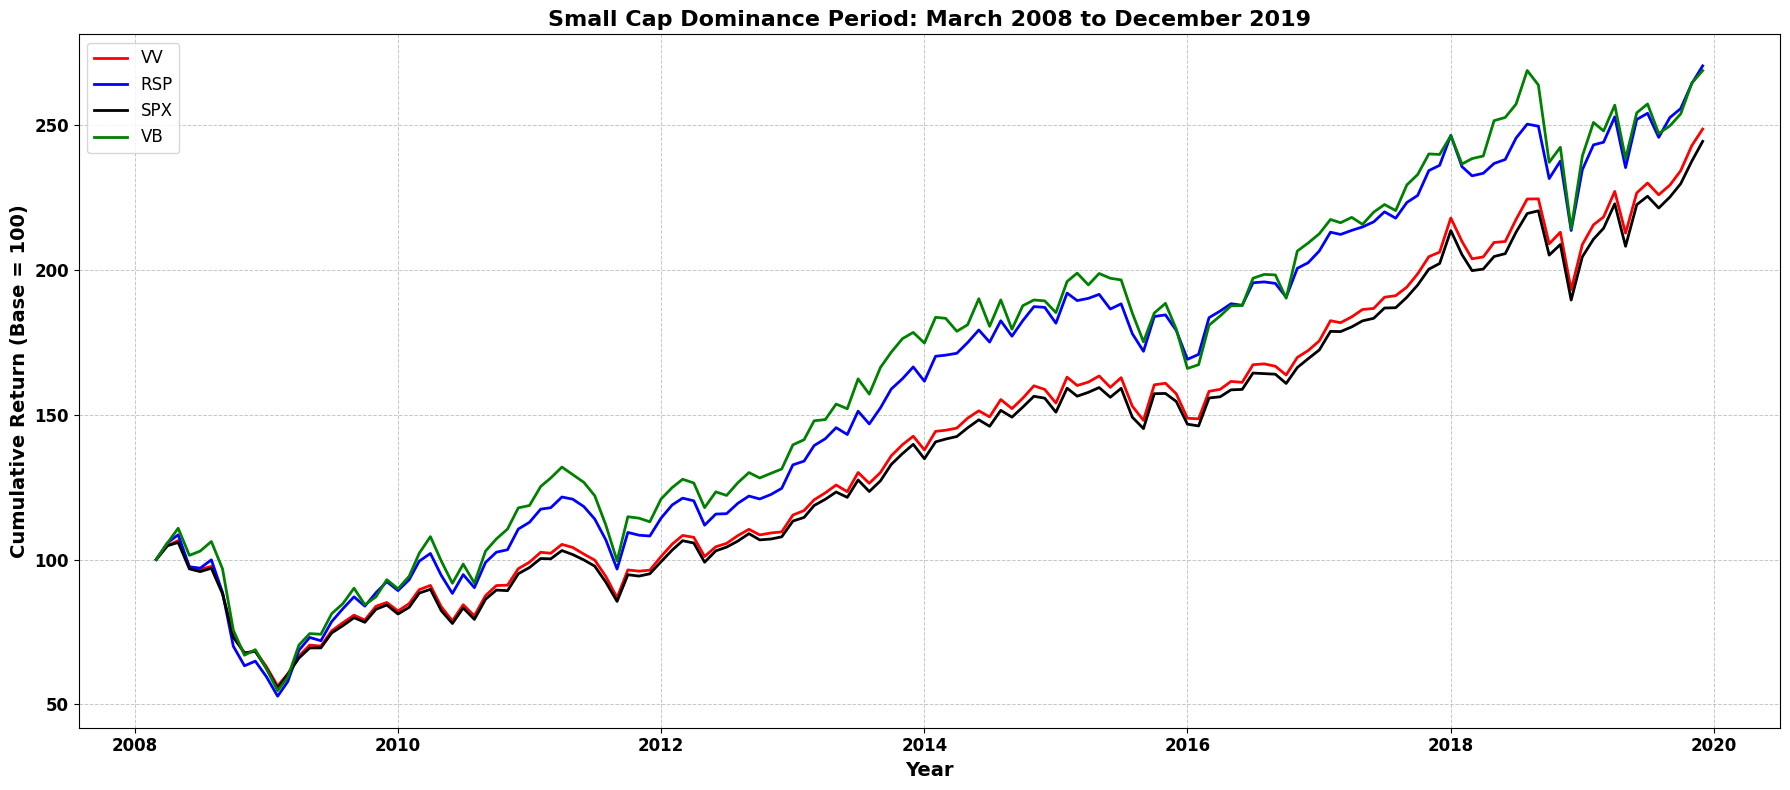

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

def load_data(filename):
    df = pd.read_csv(filename)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    return df['Close']

# Load data
indices = {
    'VV': load_data('vv_clean_MAR08_DEC19.csv'),
    'RSP': load_data('rsp_clean_MAR08_DEC19.csv'),
    'SPX': load_data('spx_clean_MAR08_DEC19.csv'),
    'VB': load_data('vb_clean_MAR08_DEC19.csv')
}

# Find the latest starting date among all indices
start_date = max(df.index.min() for df in indices.values())

# Calculate cumulative returns from the same start date
cumulative_returns = {}
for key, data in indices.items():
    # Normalize only the data starting from the found start_date
    valid_data = data[data.index >= start_date]
    cumulative_returns[key] = (valid_data / valid_data.iloc[0] * 100)

# Plotting the cumulative returns
plt.figure(figsize=(18, 8))

# Define colors to match bar graphs
colors = {'VV': 'red', 'RSP': 'blue', 'SPX': 'black', 'VB': 'green'}

for key, data in cumulative_returns.items():
    plt.plot(data.index, data, label=key, linewidth=2, color=colors[key])

# Enhance the plot with better formatting
plt.title('Small Cap Dominance Period: March 2008 to December 2019', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Cumulative Return (Base = 100)', fontsize=14, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')

# Tight layout for better spacing
plt.tight_layout()

# Show plot
plt.show()


In [11]:
import pandas as pd

def calculate_total_return(df, start_date, end_date):
    df['Date'] = pd.to_datetime(df['Date'])
    df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
    df = df.sort_values(by='Date')
    
    initial_value = df.iloc[0]['Close']
    final_value = df.iloc[-1]['Close']
    total_years = (df['Date'].iloc[-1] - df['Date'].iloc[0]).days / 365.25
    
    total_return = (final_value / initial_value - 1) * 100  # Total percentage return
    cagr = ((final_value / initial_value) ** (1 / total_years) - 1) * 100  # Annualized return
    
    return total_return, cagr

# Define the start and end dates
start_date = '2004-03-01'
end_date = '2024-03-01'

# Calculate total returns for VV
total_return_vv, cagr_vv = calculate_total_return(vv_08_19, start_date, end_date)
print(f"Total Return Mar 2008 - Dec 2019: {total_return_vv:.2f}%")
print(f"Annualized (CAGR) return for VV: {cagr_vv:.2f}%")

# Calculate total returns for VB
total_return_vb, cagr_vb = calculate_total_return(vb_08_19, start_date, end_date)
print(f"Total Return Mar 2008 - Dec 2019: {total_return_vb:.2f}%")
print(f"Annualized (CAGR) return for VB: {cagr_vb:.2f}%")

# Calculate total returns for RSP
total_return_rsp, cagr_rsp = calculate_total_return(rsp_08_19, start_date, end_date)
print(f"Total Return Mar 2008 - Dec 2019: {total_return_rsp:.2f}%")
print(f"Annualized (CAGR) return for RSP: {cagr_rsp:.2f}%")

# Calculate total returns for SPX
total_return_spx, cagr_spx = calculate_total_return(spx_08_19, start_date, end_date)
print(f"Total Return Mar 2008 - Dec 2019: {total_return_spx:.2f}%")
print(f"Annualized (CAGR) return for SPX: {cagr_spx:.2f}%")



Total Return Mar 2008 - Dec 2019: 148.51%
Annualized (CAGR) return for VV: 8.05%
Total Return Mar 2008 - Dec 2019: 168.68%
Annualized (CAGR) return for VB: 8.77%
Total Return Mar 2008 - Dec 2019: 170.31%
Annualized (CAGR) return for RSP: 8.83%
Total Return Mar 2008 - Dec 2019: 144.26%
Annualized (CAGR) return for SPX: 7.90%


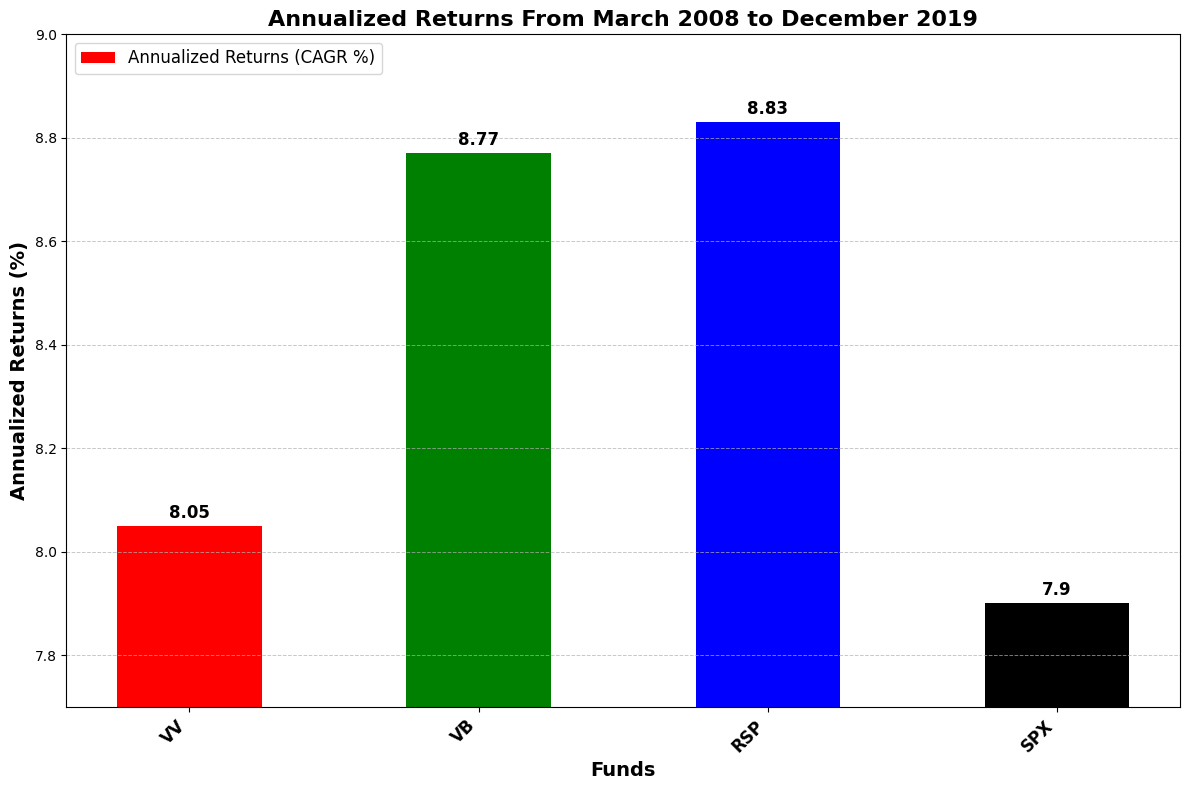

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Data
labels = ['VV', 'VB', 'RSP', 'SPX']
annualized_returns = [8.05, 8.77, 8.83, 7.9]
colors = ['red', 'green', 'blue', 'black']

# Positions
x = np.arange(len(labels))  # the label locations
width = 0.5  # the width of the bars

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
rects = ax.bar(x, annualized_returns, width, color=colors)

# Labels and Title
ax.set_xlabel('Funds', fontsize=14, fontweight='bold')
ax.set_ylabel('Annualized Returns (%)', fontsize=14, fontweight='bold')
ax.set_title('Annualized Returns From March 2008 to December 2019', fontsize=16, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12, fontweight='bold', rotation=45, ha='right')

# Add horizontal gridlines
ax.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Add data labels
ax.bar_label(rects, padding=3, fontsize=12, fontweight='bold')

# Set y-axis limit
ax.set_ylim(7.7, 9.0)

# Add a legend
ax.legend(['Annualized Returns (CAGR %)'], loc='upper left', fontsize=12)

# Tight layout for better spacing
fig.tight_layout()

# Show plot
plt.show()


In [13]:
import pandas as pd
import matplotlib.pyplot as plt

vv_08_19 = pd.read_csv("vv_clean_MAR08_DEC19.csv")
vb_08_19 = pd.read_csv("vb_clean_MAR08_DEC19.csv")
rsp_08_19 = pd.read_csv("rsp_clean_MAR08_DEC19.csv")
spx_08_19 = pd.read_csv("spx_clean_MAR08_DEC19.csv")


vv_08_19['Date'] = pd.to_datetime(vv_08_19['Date'])
vb_08_19['Date'] = pd.to_datetime(vb_08_19['Date'])
rsp_08_19['Date'] = pd.to_datetime(rsp_08_19['Date'])
spx_08_19['Date'] = pd.to_datetime(spx_08_19['Date'])

vv_08_19['Close'] = pd.to_numeric(vv_08_19['Close'], errors='coerce')
vb_08_19['Close'] = pd.to_numeric(vb_08_19['Close'], errors='coerce')
rsp_08_19['Close'] = pd.to_numeric(rsp_08_19['Close'], errors='coerce')
spx_08_19['Close'] = pd.to_numeric(spx_08_19['Close'], errors='coerce')

def quarterly_returns(df):
    df.set_index('Date', inplace=True)
    quarterly = df.resample('Q').last()  # Resample to get data at the end of each quarter
    quarterly['Quarterly Returns'] = quarterly['Close'].pct_change()
    return quarterly.dropna()  # Removing the first entry which will be NaN

vv_08_19_quarterly = quarterly_returns(vv_08_19)
vb_08_19_quarterly = quarterly_returns(vb_08_19)
rsp_08_19_quarterly = quarterly_returns(rsp_08_19)
spx_08_19_quarterly = quarterly_returns(spx_08_19)

def calculate_volatility(df):
    volatility = df['Quarterly Returns'].std() * 100  # Convert decimal to percentage
    return f"{volatility:.2f}%" 

vv_08_19_volatility = calculate_volatility(vv_08_19_quarterly)
vb_08_19_volatility = calculate_volatility(vb_08_19_quarterly)
rsp_08_19_volatility = calculate_volatility(rsp_08_19_quarterly)
spx_08_19_volatility = calculate_volatility(spx_08_19_quarterly)

print(f"Volatility of VV: {vv_08_19_volatility}")
print(f"Volatility of VB: {vb_08_19_volatility}")
print(f"Volatility of RSP: {rsp_08_19_volatility}")
print(f"Volatility of SPX: {spx_08_19_volatility}")

Volatility of VV: 8.04%
Volatility of VB: 10.10%
Volatility of RSP: 9.21%
Volatility of SPX: 7.95%


C:\Users\ziegl\AppData\Local\Temp\ipykernel_7360\3829780276.py:22: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly = df.resample('Q').last()  # Resample to get data at the end of each quarter
C:\Users\ziegl\AppData\Local\Temp\ipykernel_7360\3829780276.py:22: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly = df.resample('Q').last()  # Resample to get data at the end of each quarter
C:\Users\ziegl\AppData\Local\Temp\ipykernel_7360\3829780276.py:22: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly = df.resample('Q').last()  # Resample to get data at the end of each quarter
C:\Users\ziegl\AppData\Local\Temp\ipykernel_7360\3829780276.py:22: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly = df.resample('Q').last()  # Resample to get data at the 

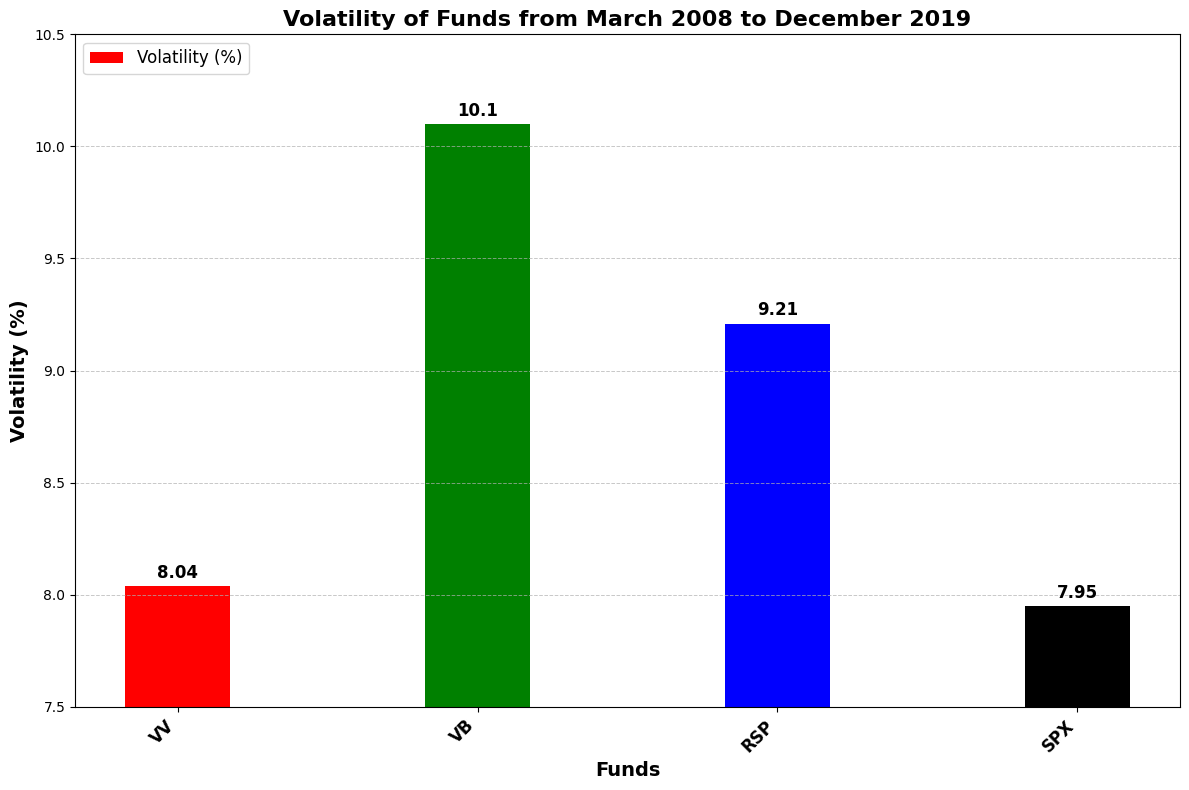

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Data
volatility_data = {
    'VV': 8.04,
    'VB': 10.10,
    'RSP': 9.21,
    'SPX': 7.95
}

labels = list(volatility_data.keys())
volatilities = list(volatility_data.values())

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
rects = ax.bar(x, volatilities, width, color=['red', 'green', 'blue', 'black'])

# Labels and Title
ax.set_xlabel('Funds', fontsize=14, fontweight='bold')
ax.set_ylabel('Volatility (%)', fontsize=14, fontweight='bold')
ax.set_title('Volatility of Funds from March 2008 to December 2019', fontsize=16, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12, fontweight='bold', rotation=45, ha='right')

# Add horizontal gridlines
ax.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)

# Add data labels
ax.bar_label(rects, padding=3, fontsize=12, fontweight='bold')

# Set y-axis limit
ax.set_ylim(7.5, 10.5)

# Add a legend
ax.legend(['Volatility (%)'], loc='upper left', fontsize=12)

# Tight layout for better spacing
fig.tight_layout()

# Show plot
plt.show()
